# Auto Insurance in Sweden
SUMMARY

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

**We try to implement Simple Linear Regression from scratch in Python and compare it to Sklearn!**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading Data

In [ ]:
df = pd.read_csv('../input/auto-insurance-in-sweden/swedish_insurance.csv')
df.head()

In [ ]:
df.rename(columns={"X": "Claims", "Y": "Payment"}, inplace = True)
df.head()

# Exploring Data

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), center = 0, annot =True, cmap='coolwarm');

In [ ]:
plt.scatter(df.Claims, df.Payment);
plt.xlabel('Claims');
plt.ylabel('Payment');

#  From Correlation and Visualization, there is a linear relation between Claims and Payment

In [ ]:
# Splitting to Feature and Label and Converting into numpy array

X = df.iloc[:,0].values
y = df.iloc[:,1].values

# Building Everything from Scratch

# Mean Formula
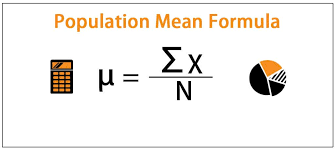

In [ ]:
def Mean (data):
    return sum(data)/ len(data)

# Variance Formula
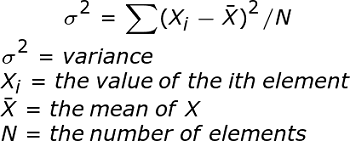

In [ ]:
def Variance(data):
    return Mean ((data - Mean(data))** 2)

# Covariance Formula
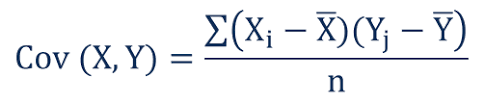

In [ ]:
def Covariance(x ,y):
    return sum ( (x - Mean(x)) * (y - Mean(y)) ) / (len(x)-1)

# Linear Regression Coefficients
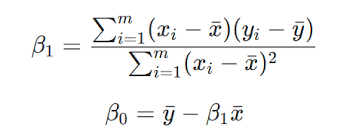

In [ ]:
def Coeff_Regression(x,y):
    b1 = Covariance(x,y) / Variance(x)
    b0 = Mean(y) - b1 * Mean(x)
    return b0 , b1

# Mean Squared Error
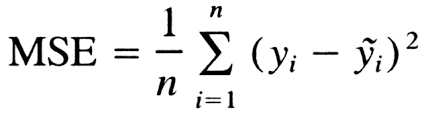

In [ ]:
def MSE (actual, predicted):
    return Mean ((actual - predicted)**2)

In [ ]:
b0 , b1 = Coeff_Regression(X,y)
y_pred = b0 + X * b1

In [ ]:
plt.scatter(X,y);
plt.plot(X,y_pred);

In [ ]:
MSE(y,y_pred)

# Using LinearRegression from Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = X.reshape(-1,1)
lin_reg.fit(X,y)

In [ ]:
y_pred2 = lin_reg.predict(X)
plt.scatter(X,y);
plt.plot(X,y_pred2);

In [ ]:
MSE(y,y_pred2)

# Sklearn results are very close to our results

Try to remove possible outliers:


In [ ]:
df = df[df['Claims']<100]
X = df.iloc[:,0].values
y = df.iloc[:,1].values

b0 , b1 = Coeff_Regression(X,y)
y_pred = b0 + X * b1

plt.scatter(X,y);
plt.plot(X,y_pred);

In [ ]:
MSE(y,y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = X.reshape(-1,1)
lin_reg.fit(X,y)

y_pred2 = lin_reg.predict(X)
plt.scatter(X,y);
plt.plot(X,y_pred2);

In [ ]:
MSE(y,y_pred2)

# Also, Sklearn results are very close to our results